In [44]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [45]:
def draw(Ox, Oy: list[list], name: str, scatter: bool = False):
    f = plt.figure(figsize=(7, 7))
    px1 = f.add_subplot(111)
    if not scatter:
        for y in Oy:
            px1.plot(Ox, y, label=name)
    else:
        for y in Oy:
            px1.scatter(Ox, y, label=name)
    px1.legend()
    f.show()

In [46]:
def fx(xvn, yvn, a):
    print(xvn, yvn)
    return -a*((xvn**3)/3-xvn)+a*yvn

def fy(xvn, yvn, c, b):
    return -xvn + c - b*yvn

In [47]:
def newtonsMethod(a, c, T, y, b, x):
    l = [x]
    for i in range(100):
        xn = l[-1]
        f = -xn+(-a*(xn**3/3-xn)+a*((-xn+c)*T+y)/(1+b*T))*T+x
        g = -1+a*T*(-T/(b*T+1)-xn**2+1)
        l.append(l[-1] - f/g)
    return l[-1]

In [48]:
def explicit_method(T, a, xvn, yvn, c, b):
    xn1 = T*fx(xvn, yvn, a) + xvn
    yn1 = T*fy(xvn, yvn, c, b) + yvn
    return (xn1, yn1)

In [49]:
def implicit_method(T, a, xvn, yvn, c, b):
    xn2 = newtonsMethod(a, c, T, yvn, b, xvn)
    yn2 = (T*(-xn2+c) + yvn)/(1+b*T)
    return (xn2, yn2)

In [50]:
def explicit4_method(T, a, xvn, yvn, c, b):
    kx1 = fx(xvn, yvn, a)
    kx2 = fx(xvn + T/2*kx1, yvn + T/2, a)
    kx3 = fx(xvn + T/2*kx2, yvn + T/2, a)
    kx4 = fx(xvn + T*kx3, yvn + T, a)
    xn = xvn + T/6*(kx1 + 2 * kx2 + 2 * kx3 + kx4)

    ky1 = fy(xvn, yvn, c, b)
    ky2 = fy(xvn + T/2, yvn + T/2 * ky1, c, b)
    ky3 = fy(xvn + T/2, yvn + T/2 * ky2, c, b)
    ky4 = fy(xvn + T/2, yvn + T * ky3, c, b)
    yn = yvn + T/6*(ky1 + 2 * ky2 + 2 * ky3 + ky4)
    
    return (xn, yn)

In [51]:
def explicit5_method(T, a, xvn, yvn, c, b):
    kx1 = fx(xvn, yvn, a)
    kx2 = fx(xvn + 1/4 * T * kx1,
             yvn + 3/2 * T, a)
    if xvn + (3/32 * kx1 + 9/32 * kx2) * T > 10:
        print(xvn + (3/32 * kx1 + 9/32 * kx2) * T)
    kx3 = fx(xvn + (3/32 * kx1 + 9/32 * kx2) * T,
             yvn + 3/8 * T, a)
    kx4 = fx(xvn + (1932/2197 * kx1 - 
             7200/2197 * kx2 + 7296/2197 * kx3) * T,
             yvn + 12/13 * T, a)
    kx5 = fx(xvn + (439/216 * kx1 - 8 * kx2
                    + 3680/513 * kx3 - 845/4104 * kx4) * T,
                    yvn + T, a)
    kx6 = fx(xvn + (-8/27 * kx1 + 2 * kx2 - 3544/2565 * kx3
                    + 1859/4104 * kx4 + 11/40 * kx5) * T,
                    yvn + 1/2 * T, a)
    xn = xvn + (16/135 * kx1 + 6656/12825 * kx3
                + 28561/56430 * kx4 + 2/55 * kx5
                - 9/50 * kx6) * T
    
    ky1 = fy(xvn, yvn, c, b)
    ky2 = fy(xvn + 3/2 * T,
             yvn + 1/4 * T * ky1, c, b)
    ky3 = fy(xvn + 3/8 * T,
             yvn + (3/32 * ky1 + 9/32 * ky2) * T, c, b)
    ky4 = fy(xvn + 12/13 * T, yvn + (1932/2197 * ky1 - 
            7200/2197 * ky2 + 7296/2197 * ky3) * T, c, b)
    ky5 = fy(xvn + T, yvn + (439/216 * ky1 - 8 * ky2
             + 3680/513 * ky3 - 845/4104 * ky4) * T, c, b)
    ky6 = fy(xvn + 1/2 * T,
             yvn + (-8/27 * ky1 + 2 * ky2 - 3544/2565 * ky3
             + 1859/4104 * ky4 + 11/40 * ky5) * T, c, b)
    yn = yvn + (16/135 * ky1 + 6656/12825 * ky3
                + 28561/56430 * ky4 + 2/55 * ky5
                - 9/50 * ky6) * T

    return (xn, yn)

In [55]:
# новый шаг
def get_p(array):
    s = sum([i ** 2 for i in array])
    return math.sqrt(1 + s)

def new_T(last_T, T0, array, array_prev, L):
    p = get_p(array)
    F = [i * p for i in array]
    p_prev = get_p(array_prev)
    F_prev = [i * p for i in array_prev]
    X = [last_T * (F[i] - F_prev[i]) for i in range(len(F))]
    XX = sum([i ** 2 for i in X])
    new_T = T0/(1 + math.sqrt(L) * XX ** (1/4))
    return new_T

$x' = -a(\frac{x^3}{3} - x) - ay$\
$y' = -x - by + c$\
$x(0) = 2,\quad y(0) = 0$\
Здесь 1 $\leq$ _a_ $\leq$ 10^3, 0 < _c_ < 1.
Провести исследование поведения решений в зависимости от значений «большого» параметра _a_.


2 0
2 0
1.3333333333333335 -0.019
1.36895714186573 -0.01982857532233117
1.4169777877213474 -0.021047907035996738
1.460004221425635 -0.02229894457678504
1.4985604140951847 -0.023592912709594027
1.5326339749628395 -0.02492524814945556
1.5623694665759593 -0.026291995268023685
1.5880146410934017 -0.02768924225468586
1.6098907623652756 -0.02911324021414498
1.6283629039532925 -0.030560471629536175
1.643813962849812 -0.03202769702824141
1.656623878922891 -0.03351198054781486
1.6671544856355272 -0.03501069762513438
1.6757396226890604 -0.03652152858210788
1.6826796826258623 -0.0380424418489014
1.688239587751364 -0.0395716701035369
1.6926492145430536 -0.04110768191253807
1.696105414588336 -0.042649150715984976
1.6987749574973314 -0.044194922433855734
1.7007978987597785 -0.0457439829522714
1.7022910304632066 -0.04729542788522087
1.703351195046572 -0.04884843966848825
1.7040583303623944 -0.05040227938963414
1.7044781749428337 -0.05195629699709251
1.7046646100481433 -0.05350995080134095
1.704661657

/tmp/ipykernel_6523/182673695.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


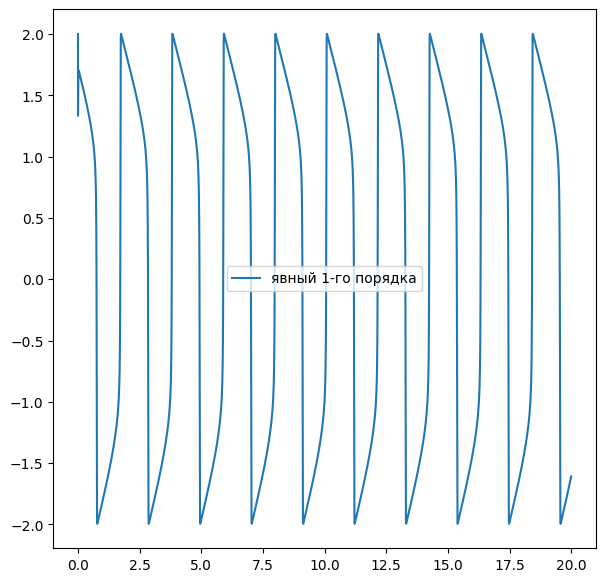

In [61]:
T0 = 0.001
T = 0.01

t_start = 0
t_finish = 20

# for a in range(1, 1000, 100):
    # b /= 1000
# for c in range(1, 100, 30):
    # c /= 10
    # for b in range(1, 200, 10):
a = 50
c = 0.8
b = 0.740625
tn = t_start
# Первый элемент это x, второй y
# array1 = [(2, 0)]
# array2 = [(2, 0)]
main_array = []
tl = [tn]


c = 0.1
a = 100
array1 = [(2, 0)]
array2 = [(2, 0)]
array3 = [(2, 0)]
array4 = [(2, 0)]

array3_dif = [(fx(array3[-1][0], array3[-1][1], a),
                    fy(array3[-1][0], array3[-1][1], c, b))]

array_T = [T]

while tl[-1] <= t_finish:
    t = tl[-1]
    #явный метод 1-го порядка
    array1.append(explicit_method(T, a, array1[-1][0], array1[-1][1], c, b))
    #неявный метод 1-го порядка
    # array2.append(implicit_method(T, a, array2[-1][0], array2[-1][1], c, b))
    #метод рунге-кутты 4-го порядка
    # array3.append(explicit4_method(T, a, array3[-1][0], array3[-1][1], c, b))
    # array4.append(explicit5_method(T, a, array4[-1][0], array4[-1][1], c, b))
    
    # array3_dif.append((fx(array3[-1][0], array3[-1][1], a),
                    # fy(array3[-1][0], array3[-1][1], c, b)))
    T = new_T(array_T[-1], T0, array1[-1], array1[-2], t_finish - t_start)
    array_T.append(T)
    tl.append(tl[-1] + T)

print(array_T)

arrayx1 = [i[0] for i in array1]
# arrayx2 = [i[0] for i in array2]
arrayx3 = [i[0] for i in array3]
arrayx4 = [i[0] for i in array4]
# main_array.append(arrayx3)
array_dif_x3 = [[i[0] for i in array3_dif]]
draw(tl, [arrayx1], "явный 1-го порядка")
# draw(px1, tl, arrayx2, "неявный 1-го порядка")
# draw(tl, [arrayx3], f"{a}, {c} рунге-кутты")
# draw(tl, array_dif_x3, f"{a} x' from t")
# draw(arrayx3, array_dif_x3, "x' from x")